# ДЗ №1

**Визуализировать результаты на тестовых и тренировочных данных, посчитать метрики, вывести коэффициенты моделей**

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовы

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных

from sklearn.preprocessing import StandardScaler, MinMaxScaler # нормализация и масштабирование данных

from sklearn.linear_model import LinearRegression # Простая линейная регрессия
from sklearn.preprocessing import PolynomialFeatures # для полиномиальной регрессии
from sklearn.svm import SVR # метод опорных векторов
from sklearn.tree import DecisionTreeRegressor # Дерево решений
from sklearn.ensemble import RandomForestRegressor # Лес деревье решений

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

import gc

from sklearn.preprocessing import LabelEncoder

In [101]:
def linear_reg_model(data, target, data_to_pred):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train.reshape(-1,1), y_train)
    pred = lr.predict([[data_to_pred]])
    y_pred = lr.predict(X_test.reshape(-1,1))
    plt.scatter(data, target, color='blue')
    plt.plot(data, lr.predict(data.reshape(-1, 1)),
         color='red')
    plt.show()
    
    print(f'Коэффициенты модели: {lr.coef_[0]}, {lr.intercept_}')
    print(f'Предсказанное значение: {pred[0]:.2f}')
    print(f'Средняя абсолютная: {mean_absolute_error(y_test, y_pred)}')
    print(f'Cредняя квадратичная: {mean_squared_error(y_test, y_pred)}')
    
    


1. Построить функцию линейной регрессии. Найти значение при $\alpha=20000$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
t & 0 & 100 & 150 & 200 & 250 & 300 & 360
\\
\hline
\alpha & 18179 & 18216 & 18261 & 18323 & 18403 & 18500 & 18641
\end{array}
$$

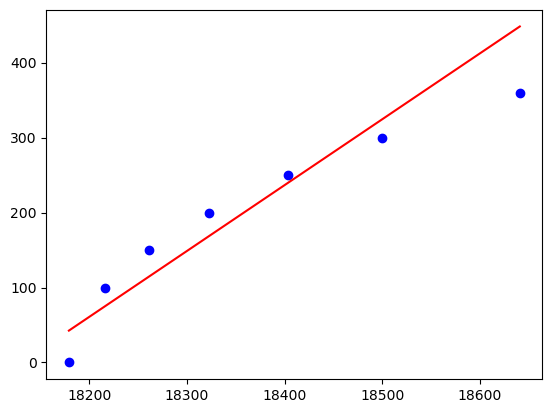

Коэффициенты модели: 0.8780261719889916, -15919.12718076068
Предсказанное значение: 1641.40
Средняя абсолютная: 61.82497267790859
Cредняя квадратичная: 4515.7919823601405


In [102]:
alpha = np.array([18179, 18216, 18261, 18323, 18403, 18500, 18641])
t = np.array([0, 100, 150, 200, 250, 300, 360])

linear_reg_model(alpha,t, 20000)

2. Построить функцию линейной регрессии. Найти значение при $S=100$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c|c}
\theta & 273 & 283 & 288 & 294 & 313 & 333 & 353 & 373
\\
\hline
S & 29,4 & 33,3 & 35,2 & 37,2 & 45,8 & 55,2 & 65,6 & 77,3
\end{array}
$$

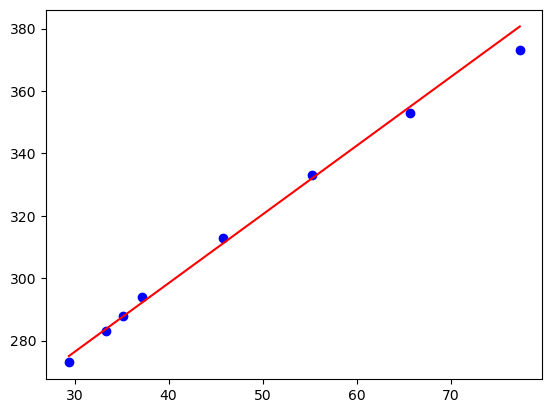

Коэффициенты модели: 2.2046369735544094, 210.2440410912917
Предсказанное значение: 430.71
Средняя абсолютная: 3.907608293320294
Cредняя квадратичная: 29.36845770219577


In [103]:
S = np.array([29.4, 33.3, 35.2, 37.2, 45.8, 55.2, 65.6, 77.3])
theta = np.array([273, 283, 288, 294, 313, 333, 353, 373])

linear_reg_model(S, theta, 100)

3. Построить функцию линейной регрессии. Найти значение при $P=20$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
\nu & 3,33 & 1,63 & 0,87 & 0,43 & 0,27 & 0,17 & 0,12
\\
\hline
P & 0,48 & 1,04 & 2,03 & 4,25 & 7,16 & 11,49 & 17,59
\end{array}
$$


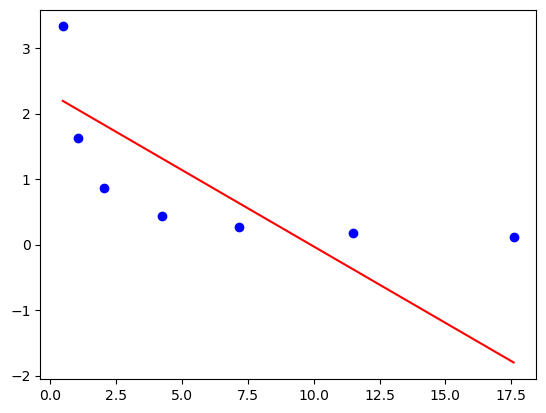

Коэффициенты модели: -0.23342653069349278, 2.3060551759070185
Предсказанное значение: -2.36
Средняя абсолютная: 1.4410584087953742
Cредняя квадратичная: 2.305955365823336


In [104]:
P = np.array([0.48, 1.04, 2.03, 4.25, 7.16, 11.49, 17.59])
nu = np.array([3.33, 1.63, 0.87, 0.43, 0.27, 0.17, 0.12])

linear_reg_model(P, nu, 20)

4. Построить функцию линейной регрессии. Найти значение при $S=1$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
V & 2,40 & 3,50 & 5,20 & 6,89 & 10,00 & 12,55 & 13,67
\\
\hline
S & 0,014 & 0,028 & 0,056 & 0,119 & 0,226 & 0,315 & 0,566
\end{array}
$$

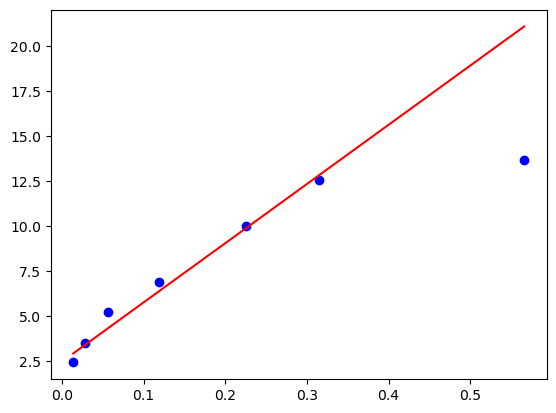

Коэффициенты модели: 32.9393611358648, 2.4433136965245827
Предсказанное значение: 35.38
Средняя абсолютная: 4.164537089645524
Cредняя квадратичная: 27.9218327616667


In [105]:
S = np.array([0.014, 0.028, 0.056, 0.119, 0.226, 0.315, 0.566])
V = np.array([2.40, 3.50, 5.20, 6.89, 10.00, 12.55, 13.67])

linear_reg_model(S, V , 1)

# ДЗ №2

1. Столбец `price` - отклик, таргет. Остальные предикторы. Столбец `make` не использовать для моделирования.
2. Сравнить между собой модели. Рассчитать метрики и сделать визуализации 
3. Использовать масштабирование признаков StandardScaler, и преобразование категориальных переменных


In [109]:
from sklearn.pipeline import Pipeline
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]


In [117]:
df = pd.read_csv(url, names=columns, na_values="?")
df = df.fillna(df.mean())
y = df['price']

C:\Users\sobak\AppData\Local\Temp\ipykernel_9800\560570429.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


4. Построить модель линейной регрессии и полиномиальной регрессии `price~horsepower`. Т.е. `price` - целевой отклик, `horsepower` - предиктор.

Линейная регрессия
   Средняя квадратичная: 27506216.66
   R^2: 0.60
Полиномиальная регрессия
   Средняя квадратичная: 30219402.18
   R^2: 0.56


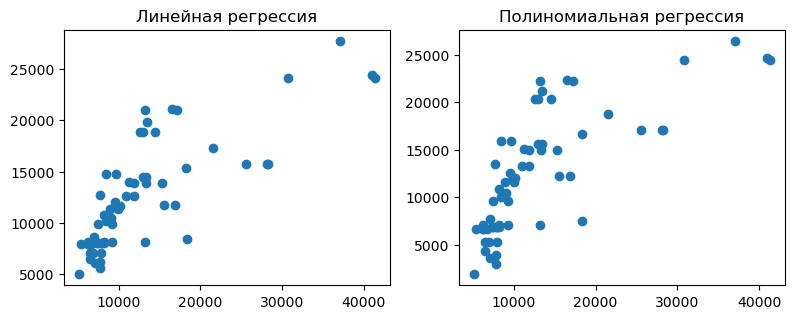

In [128]:
X_horsepower = df['horsepower'].values.reshape((-1, 1))
X_train_horsepower, X_test_horsepower, y_train_horsepower, y_test_horsepower = train_test_split(X_horsepower, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train_horsepower, y_train_horsepower)
lr_pred = lr.predict(X_test_horsepower)

poly = Pipeline(steps=[('poly_features', PolynomialFeatures(degree=2)),('regressor', LinearRegression())])
poly.fit(X_train_horsepower, y_train_horsepower)
poly_pred = poly.predict(X_test_horsepower)

models = ['Линейная регрессия', 'Полиномиальная регрессия']
predictions = [lr_pred, poly_pred]
for i, model_name in enumerate(models):
    mse = mean_squared_error(y_test_horsepower, predictions[i])
    r2 = r2_score(y_test_horsepower, predictions[i])
    print(f'{model_name}')
    print(f'   Средняя квадратичная: {mse:.2f}')
    print(f'   R^2: {r2:.2f}')

plt.figure(figsize=(12, 6))
for i, model_name in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test_horsepower, predictions[i])
    plt.title(model_name)
plt.tight_layout()
plt.show()


5. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя только числовые предикторы.

Множественная регрессия
   Средняя квадратичная: 27541923.93
   R^2: 0.54
SVM
   Средняя квадратичная: 23943330.80
   R^2: 0.60
Дерево решений
   Средняя квадратичная: 20410790.11
   R^2: 0.66
Случайный лес
   Средняя квадратичная: 16959536.05
   R^2: 0.72


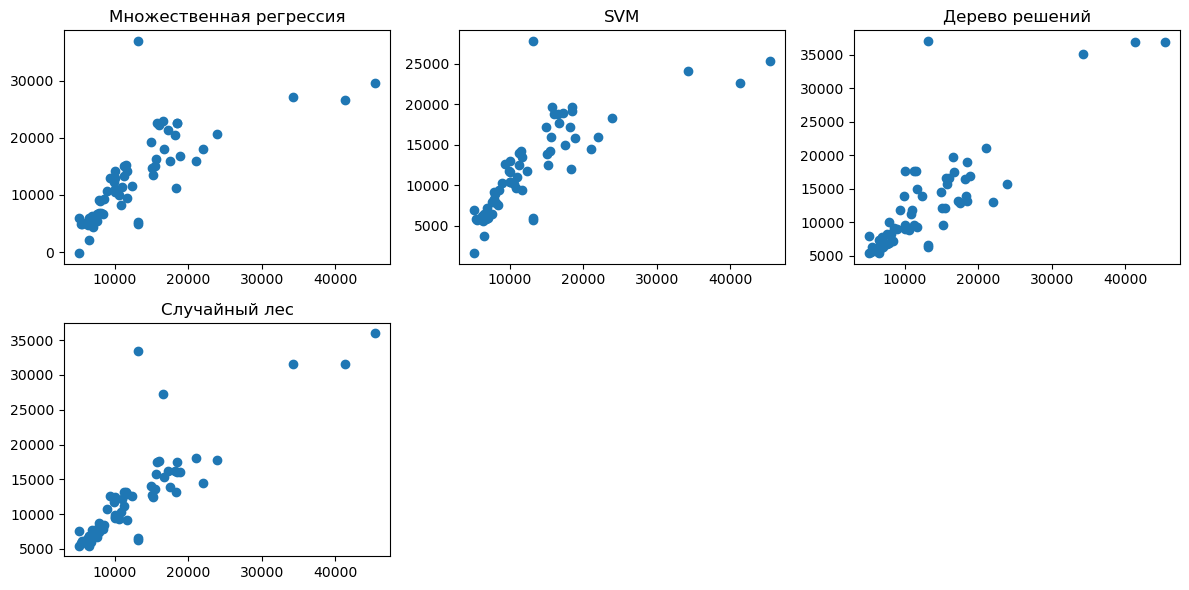

In [129]:
X_num = df[['wheel-base', 'curb-weight', 'horsepower']]
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.3, random_state=0, shuffle=True)
multiple_reg = Pipeline(steps=[('regressor', LinearRegression())])
multiple_reg.fit(X_train_num, y_train_num)
multiple_reg_pred = multiple_reg.predict(X_test_num)

svm = SVR(kernel='linear')
svm.fit(X_train_num, y_train_num)
svm_pred = svm.predict(X_test_num)

dt = DecisionTreeRegressor()
dt.fit(X_train_num, y_train_num)
dt_pred = dt.predict(X_test_num)

rf = RandomForestRegressor()
rf.fit(X_train_num, y_train_num)
rf_pred = rf.predict(X_test_num)

models = ['Множественная регрессия', 'SVM', 'Дерево решений', 'Случайный лес']

predictions = [multiple_reg_pred, svm_pred, dt_pred, rf_pred]

for i, model_name in enumerate(models):
    mse = mean_squared_error(y_test_num, predictions[i])
    r2 = r2_score(y_test_num, predictions[i])
    print(f'{model_name}')
    print(f'   Средняя квадратичная: {mse:.2f}')
    print(f'   R^2: {r2:.2f}')

plt.figure(figsize=(12, 6))
for i, model_name in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test_num, predictions[i])
    plt.title(model_name)
plt.tight_layout()
plt.show()

6. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя совместно с категориальными и числовыми предикторами.


Множественная регрессия
   Средняя квадратичная: 30895284.29
   R^2: 0.48
SVM
   Средняя квадратичная: 59863598.17
   R^2: -0.01
Дерево решений
   Средняя квадратичная: 17360432.86
   R^2: 0.71
Случайный лес
   Средняя квадратичная: 10932068.65
   R^2: 0.82


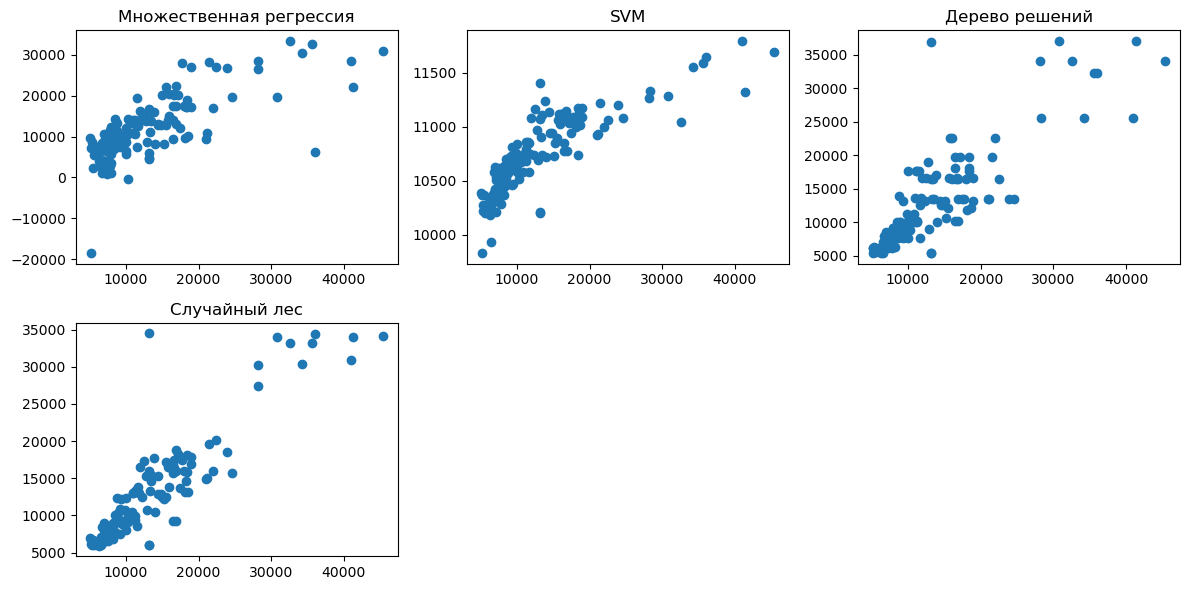

In [131]:
X = df.drop(columns=['price', 'make'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0, shuffle=True)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

multiple_reg = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', LinearRegression())])
multiple_reg.fit(X_train, y_train)
multiple_reg_pred = multiple_reg.predict(X_test)

svm = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='linear'))])
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

dt = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor())])
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

models = ['Множественная регрессия', 'SVM', 'Дерево решений', 'Случайный лес']

predictions = [multiple_reg_pred, svm_pred, dt_pred, rf_pred]

for i, model_name in enumerate(models):
    mse = mean_squared_error(y_test, predictions[i])
    r2 = r2_score(y_test, predictions[i])
    print(f'{model_name}')
    print(f'   Средняя квадратичная: {mse:.2f}')
    print(f'   R^2: {r2:.2f}')

plt.figure(figsize=(12, 6))
for i, model_name in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, predictions[i])
    plt.title(model_name)
plt.tight_layout()
plt.show()